# Homework 3
PSY4219/6129 Fall 2022

**Due September 21 in class**

**16 points**

This assignment can be done within this Jupyter notebook (.ipynb), please 
rename the notebook with your name before submitting it.

**<u>Please do not</u>** turn in the `brain.mat` file with your homework 
(for Q1) – it is a large file.

Please make sure you comment in your code and please use good programming style 
(especially points emphasized in class).

*Unexcused late assignments will be penalized 10% for every 24 hours late, 
starting from the time class ends, for a maximum of two days, after which they 
will earn a 0.*

***
## Q1 
For this question, I want you to manipulate some brain imaging data (stored in 
a numpy array).

First, you need to load the data. I received these anatomical (structural MR) 
data from a colleague who processed them using Matlab, saving them as a `.mat` 
file. There is a module (part of scipy) that can load a .mat file (details are 
presented in the class slides).

This file contains a 3D structural MR image of a human brain as a 
three-dimensional numpy array. The file is large.

In [1]:
import scipy
from scipy.io import loadmat

brainfile = loadmat('brain.mat')
brain = brainfile['data']

### (a) (4 points)
Your first part of this assignment is to write a snippet of code to display an 
axial slice, a coronal slice, and a sagittal slice from the middle point of the 
3D array (which will be roughly in the middle of the brain). 

I want you to write code that will figure out the middle slice (of the axial, 
coronal, and sagittal slice directions) for any sized `brain` array (in other 
words, your calculations of the middle point should take place in the code, not 
with pencil and paper and hard-coded into your code). In other words, you need 
to check the shape of the numpy array and use those dimensions in your code.

Axial slice -- slicing from the top of the head to the bottom of the head

Coronal slice -- slicing from the front of the head to the back of the head

Sagittal slice -- slicing from the left of the head to the right of the head

![slices](https://i.imgur.com/vRUYXZT.png)

You can display each 2D slice using the `imshow()` function from matplotlib (as 
described in class). If `axialslice` is a slice from the middle of the brain 
(from the `brain` numpy array) in the axial direction, then displaying that slice 
requires the following (we will talk about other tools for displaying and 
manipulating images later in the course – this is the simplest):

```python
import matplotlib.pyplot as plt

plt.imshow(axialslice)
plt.title('axial')
```

Use `imshow()` to display an axial, coronal, and sagittal slice (from the 
middle of the `brain` numpy array). Remember that `imshow()` only takes a 2D array 
as input. Make sure you label (with a title) the slices as axial, coronal, and 
sagittal (if the figure on this page doesn’t make that clear, feel free to 
Google around for some other example images of axial, coronal, and sagittal 
human brain slices).

You may recognize (even not being a neuroanatomy expert) that a couple of the 
slices are rotated (the bottom of the brain is not at the bottom of the image 
in coronal or sagittal images). Figure out how to rotate those numpy image 
slices by 90 degrees using `scipy.ndimage.rotate`.


In [2]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

(224, 224, 200)


Text(0.5, 1.0, 'axial')

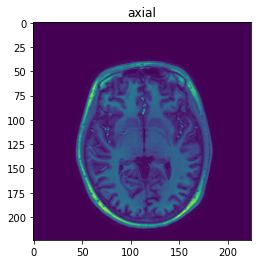

In [3]:
#### TODO: Get the middle axial slice of the brain and show it with a title ####
s = brain.shape
print(s)
indice1 = int(s[2]/2)
axialslice = brain[:,:,indice1]
plt.imshow(axialslice)
plt.title('axial')

Text(0.5, 1.0, 'coronal')

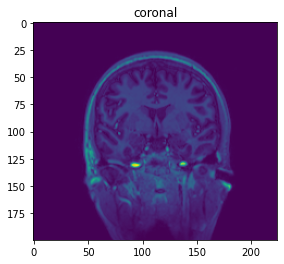

In [4]:
#### TODO: Get the middle coronal slice of the brain and show it with a title ####
indice2 = int(s[0]/2)
coronalslice = brain[indice2,:,:]
plt.imshow(rotate(coronalslice, 90))
plt.title('coronal')

Text(0.5, 1.0, 'sagittal')

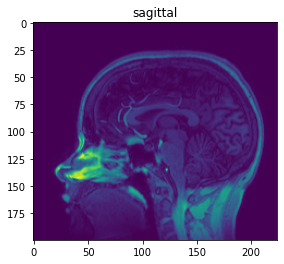

In [5]:
#### TODO: Get the middle sagittal slice of the brain and show it with a title ####
indice3 = int(s[1]/2)
sagittalslice = brain[:,indice3,:]
plt.imshow(rotate(sagittalslice, 90))
plt.title('sagittal')

### (b) (4 points)
In another code cell, I want you to write a bit of code that displays just a 
portion of the brain. 

Assume you have an `(x, y, z)` coordinate that specifies one particular 
location in the 3D `brain` array and a value `N` that specifies the size of the 
subregion to show (using `imshow`). 

For example, if `(x, y, z) = (100, 150, 50)` and `N = 49`, you would select a 
49x49 portion of the brain centered at `(100, 150)` at `z = 50` to display a 
49x49 axial slice, a 49x49 portion of the brain centered at `(150, 50)` at 
`x = 100` to display a 49x49 coronal slice, and a 49x49 portion of the brain 
centered at `(100, 50)` at `y = 150` to display a 49x49 sagittal slice.

Pulling out a portion of the `brain` array should be done using numpy array 
slicing. Display a portion of an axial, coronal, and sagittal slice given the 
values of `x, y, z`, and `N`. (Yeah, if `N` is even, the center point won’t be 
centered, just do something sensible in that case.)

Your code should check that the combination of `(x, y, z)` and `N` produces a 
valid slice (in other words, the slice shouldn’t try to index less than 0 and 
shouldn’t try to index past the end of the array). You can just print out an 
error message if an invalid slice would result based on the values of 
`x, y, z`, and `N`.

In [6]:
#### TODO: Create slices of the brain from every direction given some coordinate and size ####
# Note that the values of these variables could change!
(x, y, z) = (100, 150, 50)
N = 49
mid = (N+1)//2

### Check if the given combination of (x, y, z) and N produces a valid slice; if not, raise a Value Error.
if (x+mid >= s[0] or x-mid < 0
    or y+mid >= s[1] or y-mid < 0
    or z+mid >= s[2] or z-mid < 0):
    raise ValueError("The given combination is out of bound")

(49, 49)


Text(0.5, 1.0, '49*49 axial slice')

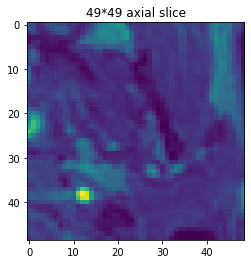

In [7]:
#### TODO: Display the axial slice ####
axial_N = brain[x-(N-mid):x+mid,y-(N-mid):y+mid,z]
print(axial_N.shape)
plt.imshow(axial_N)
plt.title(f"{N}*{N} axial slice") 

(49, 49)


Text(0.5, 1.0, '49*49 coronal slice')

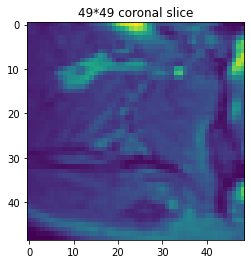

In [8]:
#### TODO: Display the coronal slice ####
coronal_N = brain[x,y-(N-mid):y+mid,z-(N-mid):z+mid]
print(coronal_N.shape)
plt.imshow(coronal_N)
plt.title(f"{N}*{N} coronal slice") 

(49, 49)


Text(0.5, 1.0, '49*49 sagittal slice')

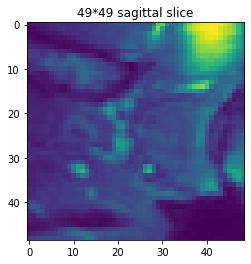

In [9]:
#### TODO: Display the sagittal slice ####
sagittal_N = brain[x-(N-mid):x+mid,y, z-(N-mid):z+mid]
print(sagittal_N.shape)
plt.imshow(sagittal_N)
plt.title(f"{N}*{N} sagittal slice") 

***
## Q2
Building off of Homework 1, I want you to now create a plot of the hemodynamic 
response function $HDR(t)$ using basic matplotlib. Part (a) asks you to 
calculate the values of $HDR(t)$ using a `for` loop and plot the function. Part 
(b) asks you to calculate the values of $HDR(t)$ using the numpy vectorization 
techniques discussed in class and plot the function.

For both, make sure that you pick increments of $t$ to make a smooth plot and 
that you pick a range of $t$ to capture the full shape of the function.

$$
HDR(t) = w\left(\frac{\beta_{1}^{\alpha_{1}}t^{\alpha_{1}}e^{-t\beta_{1}}}{\Gamma(\alpha_{1})}\right) - 
(1 - w)\left(\frac{\beta_{2}^{\alpha_{2}}t^{\alpha_{2}}e^{-t\beta_{2}}}{\Gamma(\alpha_{2})}\right)
$$

For the parameters, assume the following:

${\alpha_{1}} = 6$

${\beta_{1}} = 1$

${\alpha_{2}} = 16$

${\beta_{2}} = 1$

$w = 5/6$

Make sure that there is a plot title and that the axes are appropriately labeled.

In [10]:
#### For the parameters assume the following: ####
alpha1 = 6.
beta1 = 1.
alpha2 = 16.
beta2 = 1.
w = 5/6

### (a) (4 points)
Calculate the values of $HDR(t)$ in a numpy array using a `for` loop and plot 
the function using the matplotlib techniques discussed in class.

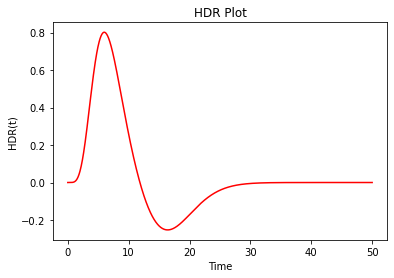

In [11]:
#### TODO: Calculate the values of the HDR function in a numpy array using a for loop and then plot the function ####
import numpy as np
import math

t = np.linspace(0, 50, 1000)
HDR_for = np.zeros(len(t))

for i in range(len(t)):
    HDR_for[i] = (w * ((beta1 ** alpha1) * (t[i] ** alpha1) * np.exp(-t[i] * beta1) / math.gamma(alpha1))
              - (1 - w) * ((beta2 ** alpha2) * (t[i] ** alpha2) * np.exp(-t[i] * beta2) / math.gamma(alpha2)))

plt.plot(t, HDR_for, 'r-')
plt.xlabel('Time')
plt.ylabel('HDR(t)')
plt.title("HDR Plot")
plt.show()

### (b) (4 points)
Calculate the values of $HDR(t)$ using the numpy vectorization techniques (in a 
single line of code) and plot the function.

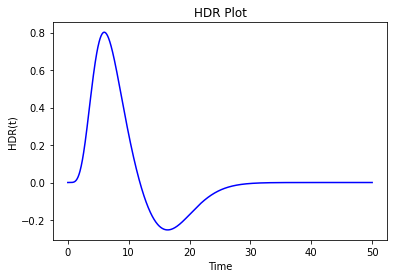

In [12]:
#### TODO: Calculate the values of the HDR function using numpy vectoriation techniques and then plot the function ####
HDR_vector = (w * ((beta1 ** alpha1) * (t ** alpha1) * np.exp(-t * beta1) / math.gamma(alpha1))
           - (1 - w) * ((beta2 ** alpha2) * (t ** alpha2) * np.exp(-t * beta2) / math.gamma(alpha2)))

plt.plot(t, HDR_vector, 'b-')
plt.xlabel('Time')
plt.ylabel('HDR(t)')
plt.title("HDR Plot")
plt.show()